# Group 3
## Use case: predict Grade
## Group Members: Dev Patel, Jay Liang, Yiran Hu, Terry Jin, Te Qi

In [28]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

# importing the dataset
df = pd.read_csv(r"D:\DEV PC\Columbia Summer Program\project_2\big_columbia_dataset.csv")

## Data Cleaning and Exploratory Data Analysis

### Changing categorical values to numeric values

In [29]:
df['grade'] = df['grade'].replace(['A'], 0)
df['grade'] = df['grade'].replace(['B'], 1)
df['grade'] = df['grade'].replace(['C'], 2)
df['grade'] = df['grade'].replace(['D'], 3)
df['grade'] = df['grade'].replace(['E'], 4)
df['grade'] = df['grade'].replace(['F'], 5)
df['grade'] = df['grade'].replace(['G'], 6)

In [30]:
print(df["emp_length"].unique())
df['emp_length'] = df['emp_length'].replace(['10+ years'], 10)
df['emp_length'] = df['emp_length'].replace(['< 1 year'], 0)
df["emp_length"].fillna(0, inplace = True)

for val in df["emp_length"].unique():
    if val not in [0, 10]:
        df['emp_length'] = df['emp_length'].replace([val], int(val[0]))

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [31]:
df["emp_length"].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [32]:
df['home_ownership'] = df['home_ownership'].replace(['RENT', 'MORTGAGE'], 0)
df['home_ownership'] = df['home_ownership'].replace(['OWN'], 1)

In [33]:
df["loan_status"].unique()

df['loan_status'] = df['loan_status'].replace(['Fully Paid'], 1)
df['loan_status'] = df['loan_status'].replace(['Current'], 1)
df['loan_status'] = df['loan_status'].replace(['Charged Off'], 0)
df['loan_status'] = df['loan_status'].replace(['Default'], 0)
df['loan_status'] = df['loan_status'].replace(['Late (31-120 days)'], 1)

In [34]:
df["term"] = df["term"].replace(" 36 months", 36)
df["term"] = df["term"].replace(" 60 months", 60)


### Correlations

In [35]:
df.corr()["grade"].sort_values(ascending=False)

grade                          1.000000
int_rate                       0.965557
total_rec_int                  0.545163
mths_since_last_record         0.544795
term                           0.539320
revol_util                     0.393834
out_prncp                      0.270261
out_prncp_inv                  0.270223
total_pymnt                    0.240430
CLI                            0.238684
total_pymnt_inv                0.233850
inq_last_6mths                 0.224765
installment                    0.175336
last_pymnt_amnt                0.147653
delinq_2yrs                    0.142249
open_acc                       0.121775
recoveries                     0.110923
annual_inc                     0.101566
revol_bal                      0.096552
collection_recovery_fee        0.087746
dti                            0.079786
total_rec_prncp                0.070818
id                             0.070616
member_id                      0.065651
total_rec_late_fee             0.062717


## Most Related Features
    int_rate                       0.965557
    total_rec_int                  0.545163
    mths_since_last_record         0.544795
    term                           0.539320
    revol_util                     0.393834
    out_prncp                      0.270261
    out_prncp_inv                  0.270223
    total_pymnt                    0.240430
    CLI                            0.238684
    total_pymnt_inv                0.233850
    inq_last_6mths                 0.224765

## Checking for null values

In [9]:
for feature in ["int_rate", "total_rec_int", "revol_util", "out_prncp", "out_prncp_inv", "total_pymnt", "CLI", "total_pymnt_inv", "inq_last_6mths", "mths_since_last_record"]:
    if df[feature].isna().sum() > 0:
        print(feature, "\n(Number of null values:", df[feature].isna().sum(), ")")

mths_since_last_record 
(Number of null values: 979 )


## Most Related Features (which are not null)
    int_rate                       0.965557
    total_rec_int                  0.545163
    term                           0.539320
    revol_util                     0.393834
    out_prncp                      0.270261
    out_prncp_inv                  0.270223
    total_pymnt                    0.240430
    CLI                            0.238684
    total_pymnt_inv                0.233850
    inq_last_6mths                 0.224765

### sweetviz analysis

In [115]:
eda = sv.analyze(df[["grade","int_rate", "term","total_rec_int", "revol_util", "out_prncp", "out_prncp_inv", "total_pymnt", "CLI", "total_pymnt_inv", "inq_last_6mths"]])
eda.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Visualizations

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

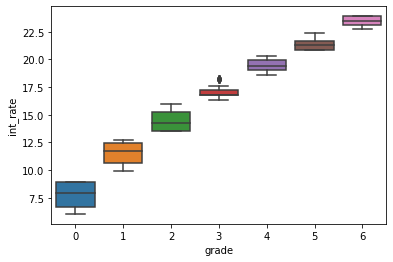

In [10]:
sns.boxplot(x="grade", y="int_rate",data=df.sort_values("grade"))

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

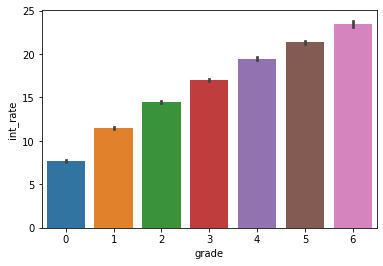

In [11]:
sns.barplot(x="grade", y = "int_rate", data=df)

<AxesSubplot:xlabel='grade', ylabel='CLI'>

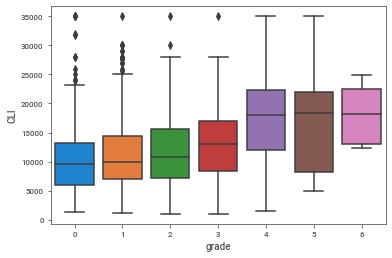

In [138]:
sns.boxplot(x="grade", y = "CLI", data=df)

<AxesSubplot:xlabel='grade', ylabel='CLI'>

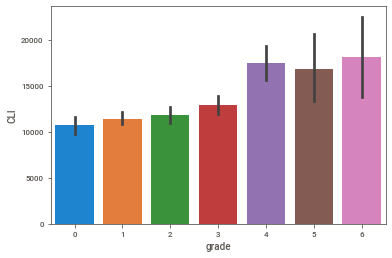

In [142]:
sns.barplot(x="grade", y = "CLI", data=df)

<AxesSubplot:xlabel='grade', ylabel='total_rec_int'>

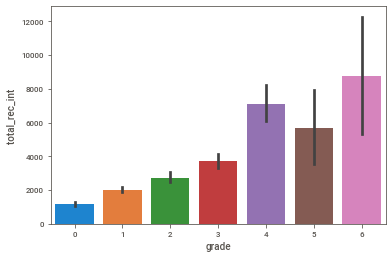

In [140]:
sns.barplot(x="grade", y = "total_rec_int", data=df)

<AxesSubplot:xlabel='grade', ylabel='inq_last_6mths'>

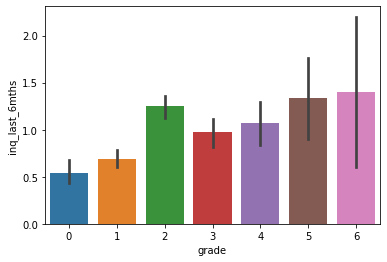

In [80]:
sns.barplot(x="grade", y="inq_last_6mths", data=df.sort_values("grade"))

### Grades Pie Chart

In [13]:
counts = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for index, row in df.iterrows():
    for key in counts:
        if row["grade"] == key:
            counts[key] += 1
            
print(list(counts.values()))

[202, 354, 207, 138, 72, 21, 5]


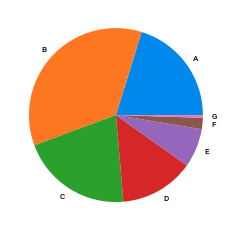

In [151]:
counts = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
for index, row in df.iterrows():
    for key in counts:
        if row["grade"] == key:
            counts[key] += 1

y = list(counts.values())
mylabels = ["A", "B", "C", "D", "E", "F", "G"]

plt.pie(y, labels = mylabels)
plt.show() 

[197, 300, 145, 72, 10, 1, 0]
[5, 54, 62, 66, 62, 20, 5]


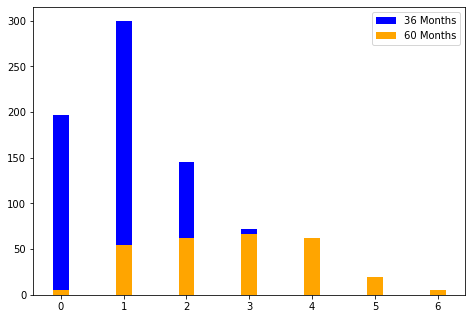

In [14]:
m36 =[]

for grade in sorted(df["grade"].unique()):
    m36.append( len(df[(df["term"] == 36) & (df["grade"] == grade)]) )

print(m36)
    
m60 =[]

for grade in sorted(df["grade"].unique()):
    m60.append( len(df[(df["term"] == 60) & (df["grade"] == grade)]) )

    
print(m60)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted(df["grade"].unique()), m36, color = 'blue', width = 0.25, label="36 Months")
ax.bar(sorted(df["grade"].unique()), m60, color = 'orange', width = 0.25, label = "60 Months")
plt.legend()

### Splitting the Dataset

In [37]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics


all_features = df.loc[: , ["int_rate","total_rec_int", "revol_util", "out_prncp", "out_prncp_inv", "total_pymnt", "CLI", "total_pymnt_inv", "inq_last_6mths"]]
Targeted_feature = df["grade"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 9), (300, 9), (699,), (300,))

## Random Forest Classifier


ACCURACY OF THE MODEL:  0.9666666666666667


Text(0.5, 1.05, 'Confusion_matrix')

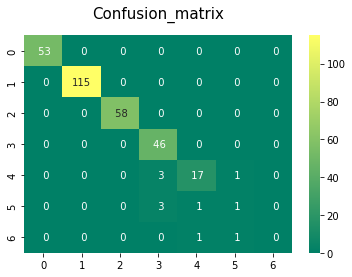

In [38]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


In [73]:
from sklearn.metrics import f1_score
list(f1_score(y_test, y_pred, average=None))

[1.0,
 1.0,
 0.9913043478260869,
 0.9782608695652174,
 0.8648648648648648,
 0.33333333333333337,
 0.0]

## Hyper Parameter Tuning

In [105]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [77]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print(grid_accuracy)

Fitting 3 folds for each of 4320 candidates, totalling 12960 fits


KeyboardInterrupt: 

### Decision Tree Classifier

ACCURACY OF THE MODEL:  0.7533333333333333


Text(0.5, 1.05, 'Confusion_matrix')

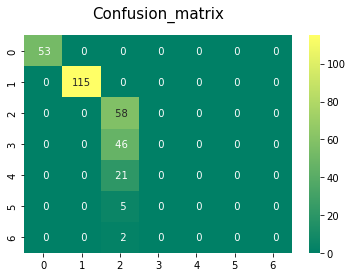

In [39]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
confusion_matrix(y_test, dtree_predictions)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, dtree_predictions))
sns.heatmap(confusion_matrix(y_test,dtree_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Hyper Parameter Tuning

ACCURACY OF THE MODEL:  0.9966666666666667


Text(0.5, 1.05, 'Confusion_matrix')

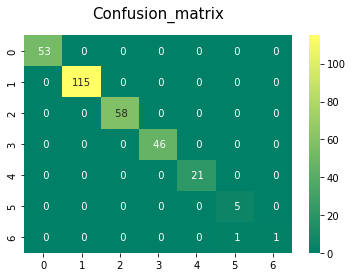

In [40]:
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

# creating a confusion matrix
confusion_matrix(y_test, dtree_predictions)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, dtree_predictions))
sns.heatmap(confusion_matrix(y_test,dtree_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### KNeighborsClassifier

0.43333333333333335


Text(0.5, 1.05, 'Confusion_matrix')

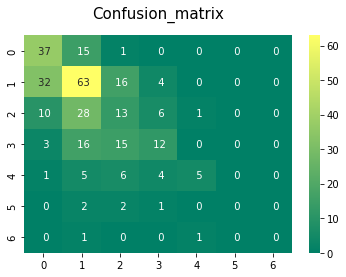

In [42]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
    
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)

# creating a confusion matrix
knn_predictions = knn.predict(X_test) 

sns.heatmap(confusion_matrix(y_test,knn_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Hyper Parameter Tuning (Dev)

In [81]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 2


0.44333333333333336


Text(0.5, 1.05, 'Confusion_matrix')

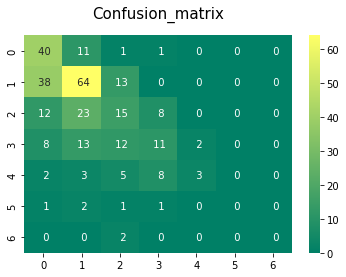

In [43]:
knn = KNeighborsClassifier(n_neighbors = 2, leaf_size=1, p=1).fit(X_train, y_train)

# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
sns.heatmap(confusion_matrix(y_test,knn_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Naive Bayes Classifier

0.87


Text(0.5, 1.05, 'Confusion_matrix')

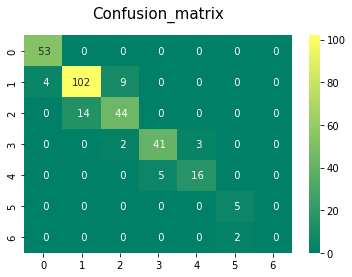

In [44]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
sns.heatmap(confusion_matrix(y_test,gnb_predictions),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Accuracy score (training): 0.967
Accuracy score (validation): 0.953


## Again tweaking the max_depth (this time for Gradient Boosting)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, random_state = 0)
gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

Accuracy score (training): 1.000
Accuracy score (validation): 0.987


### Attempted to do SVM

In [22]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
rbf = svm.SVC(kernel='linear').fit(X_train, y_train)
#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
#poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)


In [ ]:
#poly_accuracy = accuracy_score(y_test, poly_pred)
#poly_f1 = f1_score(y_test, poly_pred, average='weighted')
#print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
#print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

## Deep Learning (Dev)

In [19]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import GridSearchCV # for Hyper parameter tuning
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import metrics

data = pd.read_csv(r'D:\DEV PC\Columbia Summer Program\project_2\big_columbia_dataset.csv')

data['grade'] = data['grade'].replace(['A'], 0)
data['grade'] = data['grade'].replace(['B'], 1)
data['grade'] = data['grade'].replace(['C'], 2)
data['grade'] = data['grade'].replace(['D'], 3)
data['grade'] = data['grade'].replace(['E'], 4)
data['grade'] = data['grade'].replace(['F'], 5)
data['grade'] = data['grade'].replace(['G'], 6)

all_features = data.loc[: , ["int_rate", "total_rec_int", "revol_util", "out_prncp", "out_prncp_inv", "total_pymnt", "CLI", "total_pymnt_inv", "inq_last_6mths"]]
Targeted_feature = data["grade"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42) 

# Check the train test data set shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 9), (300, 9), (699,), (300,))

In [20]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(49, input_shape = (9,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(7, activation="softmax"))

#model.add(Dense(12, activation="relu"))
#model.add(Dense(12, activation='softmax'))

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=7)
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
70/70 [==============================] - 1s 2ms/step - loss: 2499.4575 - accuracy: 0.2160
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 1556.4792 - accuracy: 0.2432
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 1254.5586 - accuracy: 0.2561
Epoch 4/100
70/70 [==============================] - 0s 2ms/step - loss: 999.6475 - accuracy: 0.2690
Epoch 5/100
70/70 [==============================] - 0s 2ms/step - loss: 676.1033 - accuracy: 0.2732
Epoch 6/100
70/70 [==============================] - 0s 2ms/step - loss: 498.4182 - accuracy: 0.2947
Epoch 7/100
70/70 [==============================] - 0s 2ms/step - loss: 373.0866 - accuracy: 0.3090
Epoch 8/100
70/70 [==============================] - 0s 2ms/step - loss: 279.5740 - accuracy: 0.3047
Epoch 9/100
70/70 [==============================] - 0s 2ms/step - loss: 182.9704 - accuracy: 0.3119
Epoch 10/100
70/70 [==============================] - 0s 2ms/step - loss: 127.2258 - acc

In [23]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)
_, accuracy = model.evaluate(X_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))
#predictions = model.predict(X_test)     #make predictions
#predictions

10/10 [==============================] - 0s 940us/step - loss: 2.4711 - accuracy: 0.3833
Model accuracy: 38.33


# Thank You :)